<a href="https://colab.research.google.com/github/egs1sos/IS-4487/blob/main/lab_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # ⚠️ **IMPORTANT: READ BEFORE STARTING THIS LAB**
>
> ### Throughout this lab, you will see **🔧 Try It Yourself**
>
> ✅ You are expected to:
> - Complete each **"🔧 Try It Yourself”** section by writing and running your own code or answering the prompted questions in a markdown or python cell below the section.
>
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> ### These sections are **graded** and are **not optional**. Skipping them will impact your lab score.
>
> ---



# IS 4487 Lab 4: Data Understanding

## Outline

- Load and preview a real-world dataset
- Inspect structure and identify missing or unusual data
- Perform basic grouped summaries

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_04_data_understanding.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     |  Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1). |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


### 🔧 Try It Yourself – Part 1

1. Add one line of code to print the number of rows and columns.

In [ ]:
print(df.shape)

(200796, 17)


## Part 2: Inspecting, Cleaning & Removing Outliers

### Instructions:
- Identify missing values.
- Check data types are correct(e.g., dates, numeric columns).
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`.

### Think about:
- Are there missing values?
- Do the data types look appropriate?
- Do any numeric variables contain extreme or unusual values?



In [ ]:
# Check for missing values
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [ ]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


In [ ]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


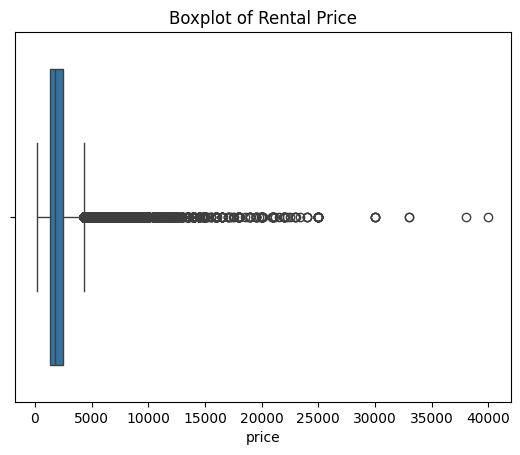

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of price
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show()

In [ ]:
# Remove price outliers (1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

### 🔧 Try It Yourself – Part 2

1. Use `.describe()` and a boxplot to check for outliers in **square footage (`sqft`)**.

2. What patterns or issues do you see with square footage values? Is there anything unusual?


In [ ]:
q_low = df['sqft'].quantile(0.01)
q_high = df['sqft'].quantile(0.99)
df = df[(df['sqft'] >= q_low) & (df['sqft'] <= q_high)]

🔧 Add comment here:

## Part 3: Basic Exploration

Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [ ]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

,price
nhood,
inverness,4950.000000
montara,4300.000000
pacific heights,4249.898551
saratoga,4200.449275
NOPA,4167.650943
haight ashbury,4141.273810
lower haight,4071.717391
west portal / forest hills,4068.426667
russian hill,3976.735294


In [ ]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,9756
san jose,6694
santa rosa,2529
santa cruz,2378
sunnyvale,2209
santa clara,2085
oakland,1701
union city,1630
mountain view,1628


### 🔧 Try It Yourself – Part 3

Explore the data by performing both of the following:

1. Group the listings by `year` and calculate the average price for each year.
2. Use `.value_counts()` on the `room_in_apt` column to see how common room rentals are.

3. Add a short comment or markdown cell describing any trends or insights you found.


In [ ]:
# Add code here
df.groupby('year')['price'].mean()
df.groupby('room_in_apt')['price'].mean()
df['room_in_apt'].value_counts()


,count
room_in_apt,
0,62225
1,98


🔧 Add comment here: As the number of rooms goes up, the price increases, and there are a lot more studio apartments available